<img src="https://github.com/danielscarvalho/data/blob/master/img/FIAP-logo.png?raw=True" style="float:right;" width="200px">

# DATA SCIENCE & STATISTICAL COMPUTING

## Engenharia de Software

### Jessica Witzler Costacurta || RM99068
### Marcio Hitoshi Tahyra || RM552511
### Camilly Breitbach Ishida || RM551474



---

###**Análise da Evolução das Emissões de CO₂ ao Longo do Tempo**
**Objetivo:** Examinar como as emissões de CO₂ evoluíram ao longo das últimas décadas e identificar tendências em diferentes países.

**Pergunta de pesquisa:** Como as emissões de CO₂ evoluíram ao longo dos últimos 20 anos em países com diferentes perfis econômicos e energéticos?

---


Para isso, utilizamos dois Datasets do Kaggle:

* **emissão.csv:** Emissions by Country

* **energia.csv:** Global Data on Sustainable Energy (2000-2020)

# Importação, Carregamento dos CSV's e Renomeação de Colunas

**Instalação das bibliotecas**

Fizemos a instalação das principais bibliotecas necessárias para a análise dos dados.

In [ ]:
!pip install vega_datasets
from vega_datasets import data
!pip install hvplot
import hvplot.pandas
import xarray as xr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.2/161.2 kB 7.6 MB/s eta 0:00:00


**Importação das bibliotecas necessárias para o estudo dos dados**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

**Carregamento os csv's**

Carregamos os csv's que contém os dados que serão analisados.

In [ ]:
emissao = pd.read_csv('emissao.csv')
energia = pd.read_csv('energia.csv')

**Renomeando as colunas**

Renomeamos as colunas para um melhor entendimento durante a análise.

In [ ]:
emissao.columns = ['pais', '3_pais', 'ano', 'total', 'carvao','petroleo', 'gas', 'queima', 'cimento', 'outros', 'perCapita']

energia.columns = ['pais', 'ano', 'acesso_eletricidade', 'CLC', 'ERPC','FEL', 'ERF', 'combustivel_fossel', 'eletricidade_nuclear', 'eletricidade_renovavel','eletricidade_baixoco2', 'consumo_pessoa', 'consumo_pessoa_pib', 'valor_emissões_de_co2', 'energia_renovavel', 'crescimento_PIB', 'PIB', 'densidade', 'area_terrestre', 'latitude', 'longitude']

# Explicação das Colunas de Cada CSV

### emissao


* pais - nome do pais.

* 3_pais - código de três letras do país.

* ano - o ano dos dados.

* total - quantidade de emissão de CO2 total.

* carvao (o mesmo com petróleo, gás, cimento e queima) - quantidade de CO2 emitido proveniente do carvão, petróleo, gás, produção de cimento e operações de queima.

* outros - outros fatores que causaram emissão de carbono.

* per capita - quantidade de emissões de CO2 per capita do país.



### energia


* pais - nome do pais.

* ano - ano dos dados.

* acesso_eletricidade - porcentagem da população com acesso a eletricidade.

* CLC - porcentagem da população com acesso a combustíveis limpos para cozinhar.

* ERPC - capacidade instalada de energia renovável por pessoa.

* FEL - financiamento de países desenvolvidos para projetos de energia limpa.

* ERF - porcentagem de energia renovável no consumo final de energia.

* combustivel_fossel - eletricidade gerada a partir de combustíveis fósseis em terawatts-hora.

* eletricidade_nuclear - eletricidade gerada pela energia nuclear em terawatts-hora.

* eletricidade_renovavel - letricidade gerada a partir de fontes renováveis em terawatts-hora.

* eletricidade_baixoco2 - porcentagem de eletricidade proveniente de fontes de baixo carbono (nuclear e renováveis).

* consumo_pessoa - consumo de energia por pessoa em quilowatts-hora.

* consumo_pessoa_pib - uso de energia por unidade do PIB em paridade de poder de compra.

* valor_emissões_de_co2 - emissões de dióxido de carbono por pessoa em toneladas métricas.

* energia_renovavel - energia primária equivalente derivada de fontes renováveis.

* crescimento_PIB - taxa de crescimento anual do PIB com base na moeda local constante.

* PIB - produto interno bruto por pessoa.

* densidade - densidade populacional em pessoas por quilômetro quadrado.

* area_terrestre - área total terrestre em quilômetros quadrados.

* latitude - latitude do país em graus decimais.

* longitude - longitude do país em graus decimais.


# Análise, limpeza e formatação de dados

### Junção dos csv's

Unimos os dados dos arquivos "emissao" e "energia" com a função merge, usando as colunas "ano" e "pais" como referência. Assim, combinamos informações sobre emissões de CO₂ e dados energéticos em uma única tabela, o que facilita a análise e comparação entre os dados de cada país ano a ano.

In [ ]:
# Realiza o merge das tabelas usando as colunas 'pais' e 'ano'
dados = pd.merge(emissao, energia, on=["pais", "ano"], how="inner")

dados.head()

,pais,3_pais,ano,total,carvao,petroleo,gas,queima,cimento,outros,...,consumo_pessoa,consumo_pessoa_pib,valor_emissões_de_co2,energia_renovavel,crescimento_PIB,PIB,densidade,area_terrestre,latitude,longitude
0,Afghanistan,AFG,2000,1.047128,0.003664,0.787760,0.223504,0.010216,0.021984,NaN,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,AFG,2001,1.069098,0.069616,0.762112,0.208848,0.006538,0.021984,NaN,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,AFG,2002,1.340995,0.055109,0.727438,0.547416,0.011033,0.000000,NaN,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,AFG,2003,1.559602,0.091813,0.991575,0.466408,0.009807,0.000000,NaN,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,AFG,2004,1.237247,0.091600,0.908672,0.227168,0.009807,0.000000,NaN,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


Utilizamos o parâmetro inner no merge para garantir que apenas os valores que aparecem em ambos os CSVs, nas colunas "ano" e "pais", fossem incluídos na tabela final. Isso permite que a junção contenha apenas os registros que possuem correspondência em ambas as tabelas, garantindo uma análise com dados completos para cada país e ano.

In [ ]:
#***
dados

,pais,3_pais,ano,total,carvao,petroleo,gas,queima,cimento,outros,...,consumo_pessoa,consumo_pessoa_pib,valor_emissões_de_co2,energia_renovavel,crescimento_PIB,PIB,densidade,area_terrestre,latitude,longitude
0,Afghanistan,AFG,2000,1.047128,0.003664,0.787760,0.223504,0.010216,0.021984,NaN,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
1,Afghanistan,AFG,2001,1.069098,0.069616,0.762112,0.208848,0.006538,0.021984,NaN,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
2,Afghanistan,AFG,2002,1.340995,0.055109,0.727438,0.547416,0.011033,0.000000,NaN,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.939110,67.709953
3,Afghanistan,AFG,2003,1.559602,0.091813,0.991575,0.466408,0.009807,0.000000,NaN,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,Afghanistan,AFG,2004,1.237247,0.091600,0.908672,0.227168,0.009807,0.000000,NaN,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3560,Zimbabwe,ZWE,2016,10.533453,6.932288,3.140048,0.000000,0.461117,0.000000,NaN,...,3227.68020,10.00,11020.000460,NaN,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3561,Zimbabwe,ZWE,2017,9.596071,5.900452,3.226752,0.000000,0.468867,0.000000,NaN,...,3068.01150,9.51,10340.000150,NaN,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3562,Zimbabwe,ZWE,2018,11.795478,7.177776,4.059712,0.000000,0.557990,0.000000,NaN,...,3441.98580,9.83,12380.000110,NaN,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3563,Zimbabwe,ZWE,2019,11.114607,6.888320,3.656672,0.000000,0.569615,0.000000,NaN,...,3003.65530,10.47,11760.000230,NaN,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857


### Verificando nomes repetidos

Criamos uma função para que, caso os nomes das colunas sejam parecidos ou iguais, ele irá adicionar um sufixo, evitando assim a existência de duplicatas.

In [ ]:
def corrigir_nomes_colunas(dados):
    nomes_corrigidos = {}

    for nome in dados.columns:
        # Se o nome já está no dicionário, adicionar um sufixo
        if nome in nomes_corrigidos:
            contador = 1
            novo_nome = f"{nome}_{contador}"
            while novo_nome in nomes_corrigidos:
                contador += 1
                novo_nome = f"{nome}_{contador}"
            nomes_corrigidos[nome] = novo_nome
        else:
            nomes_corrigidos[nome] = nome

    # Renomear as colunas
    dados.rename(columns=nomes_corrigidos, inplace=True)

# Corrige os nomes
corrigir_nomes_colunas(dados)

#***
print("Novos nomes das colunas:")
for coluna in dados.columns.tolist():
  print(f'-{coluna}')

Novos nomes das colunas:
-pais
-3_pais
-ano
-total
-carvao
-petroleo
-gas
-queima
-cimento
-outros
-perCapita
-acesso_eletricidade
-CLC
-ERPC
-FEL
-ERF
-combustivel_fossel
-eletricidade_nuclear
-eletricidade_renovavel
-eletricidade_baixoco2
-consumo_pessoa
-consumo_pessoa_pib
-valor_emissões_de_co2
-energia_renovavel
-crescimento_PIB
-PIB
-densidade
-area_terrestre
-latitude
-longitude


### Correção de outliers

Fizemos a correção substituindo os outliers das colunas pela mediana, limpando os dados e tornando-os mais robustos.

In [ ]:
# Substitui outliers pela mediana
def replace_outliers_with_median(dados, column):
    Q1 = dados[column].quantile(0.25)
    Q3 = dados[column].quantile(0.75)
    IQR = Q3 - Q1

    # Limites inferior e superior
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median_value = dados[column].median()
    dados[column] = np.where((dados[column] < lower_bound) | (dados[column] > upper_bound), median_value, dados[column])

dados.head()

,pais,3_pais,ano,total,carvao,petroleo,gas,queima,cimento,outros,...,consumo_pessoa,consumo_pessoa_pib,valor_emissões_de_co2,energia_renovavel,crescimento_PIB,PIB,densidade,area_terrestre,latitude,longitude
0,Afghanistan,AFG,2000,1.047128,0.003664,0.787760,0.223504,0.010216,0.021984,NaN,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,AFG,2001,1.069098,0.069616,0.762112,0.208848,0.006538,0.021984,NaN,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,AFG,2002,1.340995,0.055109,0.727438,0.547416,0.011033,0.000000,NaN,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,AFG,2003,1.559602,0.091813,0.991575,0.466408,0.009807,0.000000,NaN,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,AFG,2004,1.237247,0.091600,0.908672,0.227168,0.009807,0.000000,NaN,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


# Análise descritiva dos dados

### Tipos de Variáveis

**Caracterização das variáveis em tipos (categórico e numérico)**

Verificamos quais variáveis eram categóricas e quais eram continuas.

In [ ]:
# Verificando as tipos de variáveis
tipos_variaveis = dados.dtypes

# Separando as variáveis
variaveis_continuas = tipos_variaveis[tipos_variaveis != 'object'].index.tolist()
variaveis_categoricas = tipos_variaveis[tipos_variaveis == 'object'].index.tolist()

print("Variáveis Numéricas:", variaveis_continuas)
print("Variáveis Categóricas:", variaveis_categoricas)

Variáveis Numéricas: ['ano', 'total', 'carvao', 'petroleo', 'gas', 'queima', 'cimento', 'outros', 'perCapita', 'acesso_eletricidade', 'CLC', 'ERPC', 'FEL', 'ERF', 'combustivel_fossel', 'eletricidade_nuclear', 'eletricidade_renovavel', 'eletricidade_baixoco2', 'consumo_pessoa', 'consumo_pessoa_pib', 'valor_emissões_de_co2', 'energia_renovavel', 'crescimento_PIB', 'PIB', 'area_terrestre', 'latitude', 'longitude']
Variáveis Categóricas: ['pais', '3_pais', 'densidade']


**Análise dos tipos de variáveis**

Analisamos o tipo de cada variável para definir as combinações que poderíamos realizar durante a análise dos dados. Essa abordagem nos ajudou a entender como cada variável se comporta e a selecionar as melhores técnicas e ferramentas para explorar as relações entre elas de forma eficaz.

In [ ]:
tipos_variaveis = dados.dtypes

print(tipos_variaveis)

pais                       object
3_pais                     object
ano                         int64
total                     float64
carvao                    float64
petroleo                  float64
gas                       float64
queima                    float64
cimento                   float64
outros                    float64
perCapita                 float64
acesso_eletricidade       float64
CLC                       float64
ERPC                      float64
FEL                       float64
ERF                       float64
combustivel_fossel        float64
eletricidade_nuclear      float64
eletricidade_renovavel    float64
eletricidade_baixoco2     float64
consumo_pessoa            float64
consumo_pessoa_pib        float64
valor_emissões_de_co2     float64
energia_renovavel         float64
crescimento_PIB           float64
PIB                       float64
densidade                  object
area_terrestre            float64
latitude                  float64
longitude     

### Descrição das Variáveis

**Describe**

Utilizamos o describe para que fosse possível saber a descrição completa de cada uma das variáveis presentes no dataset.

In [ ]:
dados.describe()

,ano,total,carvao,petroleo,gas,queima,cimento,outros,perCapita,acesso_eletricidade,...,eletricidade_baixoco2,consumo_pessoa,consumo_pessoa_pib,valor_emissões_de_co2,energia_renovavel,crescimento_PIB,PIB,area_terrestre,latitude,longitude
count,3565.000000,3565.000000,3544.000000,3544.000000,3544.000000,3469.000000,3544.000000,840.000000,3565.000000,3555.000000,...,3523.000000,3565.000000,3362.000000,3.144000e+03,1470.000000,3276.000000,3310.000000,3.564000e+03,3564.000000,3564.000000
mean,2010.039271,129.594137,60.109932,40.473826,20.847785,6.498671,1.321678,5.264043,4.672444,78.737373,...,36.708293,25266.634903,5.325069,1.291621e+05,12.186844,3.467886,12812.302486,5.896275e+05,18.206735,14.980680
std,6.054200,660.286622,477.209697,115.352945,47.547012,48.587631,4.019103,21.126146,6.393056,30.382557,...,34.334464,34772.829750,3.563029,6.641584e+05,15.154594,5.721908,19106.308737,1.437336e+06,24.034141,66.379038
min,2000.000000,0.000000,0.000000,0.007328,0.000000,0.000000,0.000000,0.000046,0.000000,1.252269,...,0.000000,0.000000,0.110000,1.000000e+01,0.000000,-62.075920,111.927225,2.100000e+01,-40.900557,-175.198242
25%,2005.000000,1.890624,0.000000,1.420775,0.000000,0.021659,0.000000,0.317167,0.610755,58.929516,...,2.714172,3003.655300,3.170000,2.110000e+03,2.106928,1.396788,1312.210241,2.633800e+04,3.202778,-11.779889
50%,2010.000000,10.028067,0.211728,6.072542,0.348080,0.490674,0.000000,1.017028,2.449091,98.100000,...,26.952402,12796.636000,4.275000,1.048000e+04,6.432757,3.614912,4548.719898,1.184840e+05,17.060816,19.145136
75%,2015.000000,58.798911,8.098037,27.254664,15.504500,2.036888,0.475215,3.482262,6.242710,100.000000,...,64.403792,32487.746000,6.040000,5.871750e+04,17.264888,5.891842,15191.362140,5.131200e+05,38.969719,46.199616
max,2020.000000,10956.213369,7605.716883,1627.725238,687.880944,858.232613,46.393568,177.256846,62.259216,100.000000,...,100.000010,262585.700000,32.570000,1.070722e+07,86.836586,123.139555,123514.196700,9.984670e+06,64.963051,178.065032


In [ ]:
dados.sample(5)

,pais,3_pais,ano,total,carvao,petroleo,gas,queima,cimento,outros,...,consumo_pessoa,consumo_pessoa_pib,valor_emissões_de_co2,energia_renovavel,crescimento_PIB,PIB,densidade,area_terrestre,latitude,longitude
3016,South Africa,ZAF,2018,435.237182,355.111886,65.482456,9.119619,5.466088,0.057133,NaN,...,24742.117,7.73,434350.006100,2.659158,1.487617,7005.095413,49,1219090.0,-30.559482,22.937506
1110,Finland,FIN,2018,45.796461,17.922401,22.100755,4.411671,0.601681,0.090786,0.669166,...,60528.164,5.37,44580.001830,28.641554,1.141948,49964.499910,18,338145.0,61.924110,25.748151
2776,Sao Tome and Principe,STP,2002,0.058624,0.000000,0.058624,0.000000,0.000000,0.000000,NaN,...,2061.275,4.48,59.999999,NaN,2.376878,577.628404,242,836.0,0.330192,6.733343
95,Antigua and Barbuda,ATG,2011,0.443344,0.000000,0.443344,0.000000,0.000000,0.000000,NaN,...,32616.084,4.08,540.000022,NaN,-1.958613,12746.633470,223,443.0,17.060816,-61.796428
2701,Romania,ROU,2011,91.754477,33.285690,25.239043,28.386938,3.088841,0.644720,1.109245,...,20211.152,3.57,84059.997560,11.033340,1.906068,9099.217539,84,238391.0,45.943161,24.966760


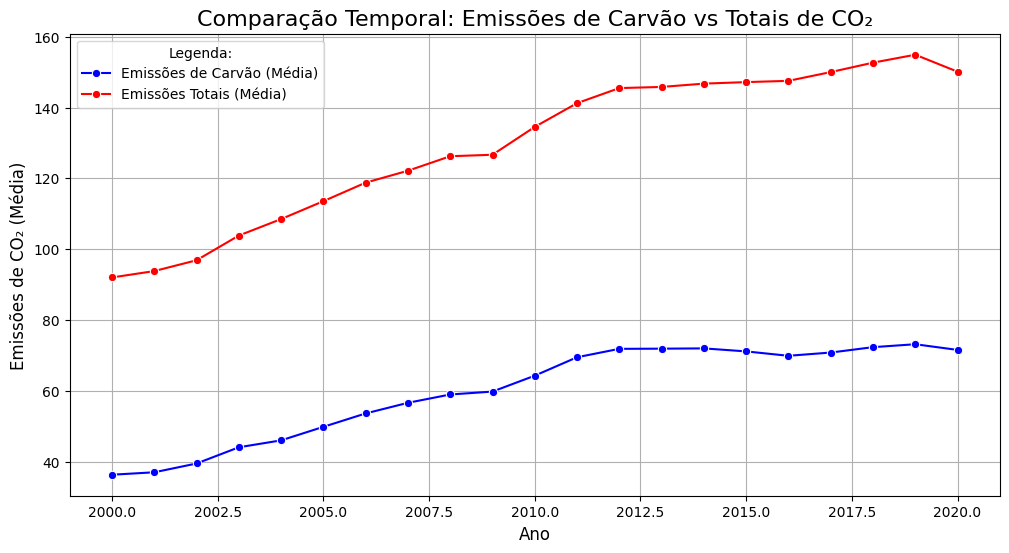

In [ ]:
#***
plt.figure(figsize=(12, 6))

sns.lineplot(
    data=dados.groupby('ano')['carvao'].mean().reset_index(),
    x='ano',
    y='carvao',
    marker='o',
    label='Emissões de Carvão (Média)',
    color='blue'
)

sns.lineplot(
    data=dados.groupby('ano')['total'].mean().reset_index(),
    x='ano',
    y='total',
    marker='o',
    label='Emissões Totais (Média)',
    color='red'
)

plt.title('Comparação Temporal: Emissões de Carvão vs Totais de CO₂', fontsize=16)
plt.ylabel('Emissões de CO₂ (Média)', fontsize=12)
plt.xlabel('Ano', fontsize=12)
plt.grid(True)

plt.legend(title='Legenda:')

plt.show()


*** Emissão total segue a tendência do carvão

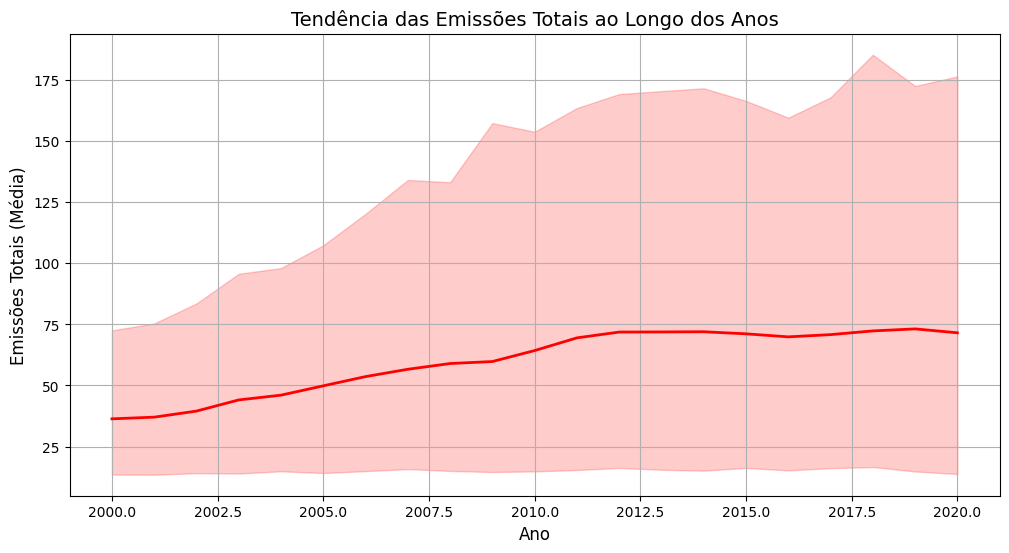

In [ ]:
#***
plt.figure(figsize=(12, 6))
sns.lineplot(data=dados, x="ano", y="carvao", color="red", linewidth=2)
plt.title("Tendência das Emissões Totais ao Longo dos Anos", fontsize=14)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Emissões Totais (Média)", fontsize=12)
plt.grid(True)
plt.show()

*** A média de emissões total vem crescendo. Ainda, nota-se uma maior variabilidade no dados a partir de 2010 e mais consistência para anos anteriores a 2005.

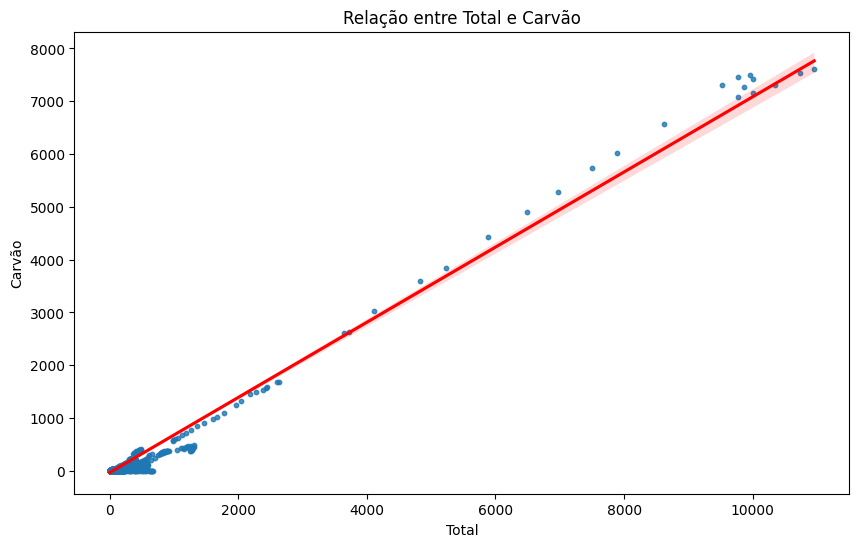

In [ ]:
#***
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.regplot(x='total', y='carvao', data=dados, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Relação entre Total e Carvão')
plt.xlabel('Total')
plt.ylabel('Carvão')
plt.show()

*** A Inclinação positiva indica que o uso de carvão e total de emissões crescem junto, provavelmente pois o carvão influencia o total.

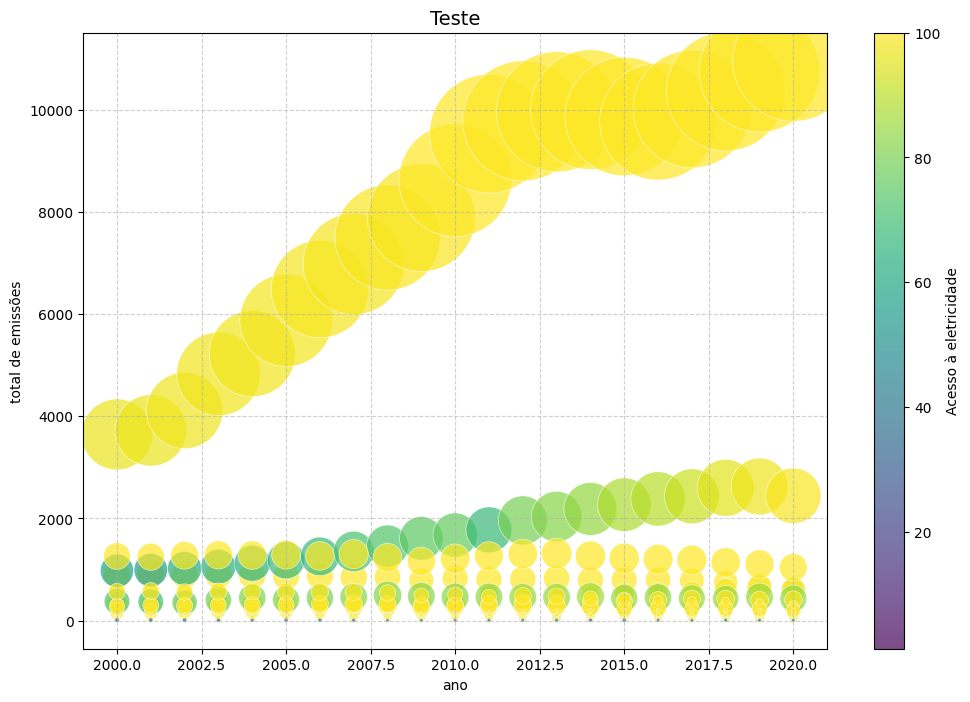

In [ ]:
#***
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    x=dados["ano"],
    y=dados["total"],
    c=dados["acesso_eletricidade"],
    s=dados["carvao"],
    cmap="viridis",
    alpha=0.7,
    edgecolors="w",
    linewidth=0.5
)
plt.colorbar(scatter, label="Acesso à eletricidade")
plt.title("Teste", fontsize=14)
plt.xlabel("ano")
plt.ylabel("total de emissões")
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()

*** Países com grandes taxas de emissão de gás carbono apresentam tanto a um maior uso de carvão, quanto a um grande acesso a eletricidade. Ainda, nota-se o crescimento das emissões com os anos.

***

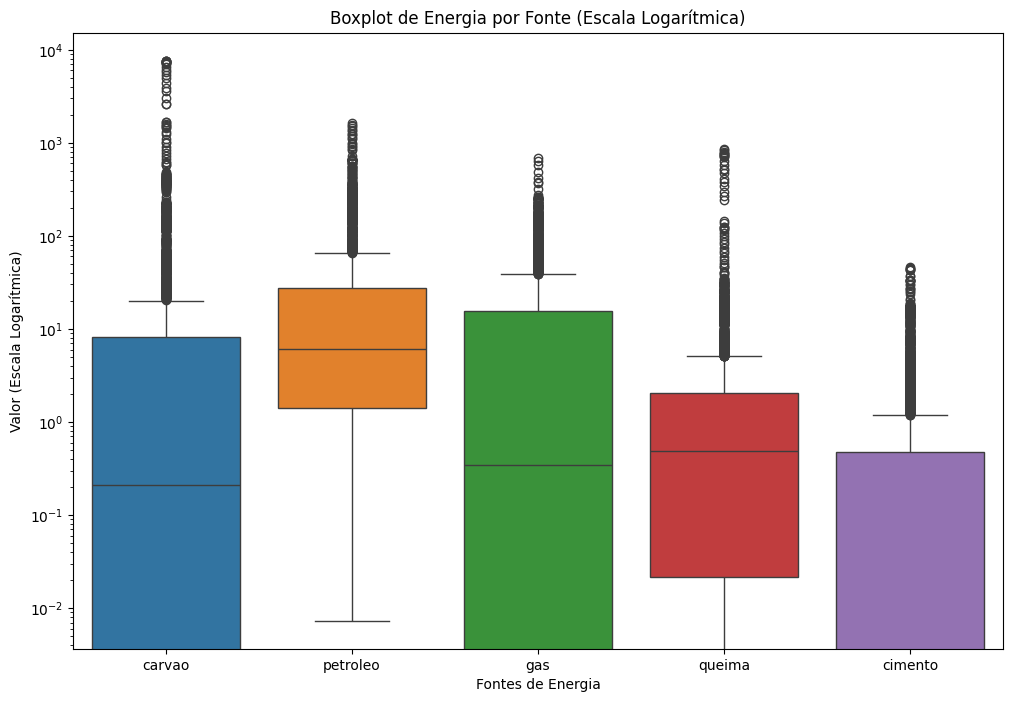

In [ ]:
#***
plt.figure(figsize=(12, 8))

sns.boxplot(data=dados[['carvao', 'petroleo', 'gas', 'queima', 'cimento']])

plt.yscale('log')

plt.title('Boxplot de Energia por Fonte (Escala Logarítmica)')
plt.xlabel('Fontes de Energia')
plt.ylabel('Valor (Escala Logarítmica)')

plt.show()

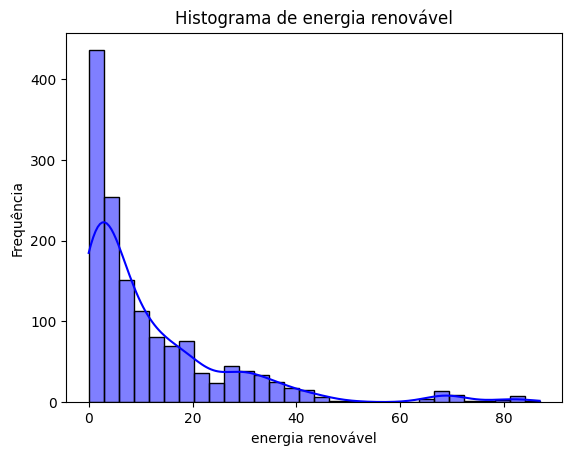

In [ ]:
#***
sns.histplot(dados['energia_renovavel'], bins=30, kde=True, color='blue')
plt.title('Histograma de energia renovável')
plt.xlabel('energia renovável')
plt.ylabel('Frequência')
plt.show()

*** Maior frequencia no baixo uso de energia renovável.

**Sample**

Por meio do "sample", observamos 10 exemplos aleatórios do dataset.

In [ ]:
dados.sample(10)

,pais,3_pais,ano,total,carvao,petroleo,gas,queima,cimento,outros,...,consumo_pessoa,consumo_pessoa_pib,valor_emissões_de_co2,energia_renovavel,crescimento_PIB,PIB,densidade,area_terrestre,latitude,longitude
2233,Nauru,NRU,2013,0.047632,0.000000,0.047632,0.000000,0.000000,0.000000,NaN,...,26976.27000,6.06,50.000001,NaN,30.612245,9648.495655,541,21.0,-0.522778,166.931503
1896,North Macedonia,MKD,2005,11.178864,8.002176,2.682048,0.142896,0.351744,0.000000,NaN,...,15711.26600,5.34,9229.999542,13.126352,4.724089,3072.678573,83,25713.0,41.608635,21.745275
813,Cuba,CUB,2015,29.468648,0.021987,26.233866,2.389228,0.669521,0.154047,NaN,...,11280.01100,1.57,29209.999080,NaN,4.438142,7694.014637,106,110860.0,21.521757,-77.781167
2719,Rwanda,RWA,2008,0.527816,0.000000,0.490976,0.000000,0.036840,0.000000,NaN,...,289.52340,5.88,560.000002,NaN,11.161243,543.545357,525,26338.0,-1.940278,29.873888
2360,Niger,NER,2014,2.245619,0.388384,1.678112,0.000000,0.008137,0.170986,NaN,...,506.64435,5.63,2150.000095,NaN,6.642137,564.596749,19,1267000.0,17.607789,8.081666
1692,Kiribati,KIR,2011,0.054960,0.000000,0.054960,0.000000,0.000000,0.000000,NaN,...,2205.63300,6.47,50.000001,NaN,1.594322,1734.903839,147,811.0,1.836898,-157.376832
773,Costa Rica,CRI,2017,8.198038,0.018320,7.481888,0.000000,0.697830,0.000000,NaN,...,12649.78300,2.09,8260.000229,NaN,4.157699,12225.574490,100,51100.0,9.748917,-83.753428
3399,United Arab Emirates,ARE,2002,83.698221,0.359056,10.310047,69.525034,2.599116,0.904969,NaN,...,162836.45000,5.40,99150.001530,0.000000,2.433457,31567.546310,118,83600.0,23.424076,53.847818
2039,Mauritania,MRT,2001,1.172480,0.000000,1.172480,0.000000,0.000000,0.000000,NaN,...,1906.99400,2.62,1400.000000,NaN,-0.799494,646.115116,5,1030700.0,21.007890,-10.940835
1204,Germany,DEU,2006,877.938802,369.596095,304.553748,178.395732,13.340261,3.068642,8.984325,...,50043.03000,3.89,814409.973100,6.026305,3.816442,36323.447740,240,357022.0,51.165691,10.451526


### Utilização do Pandas Profilling para Descrição de Dados

Utilizamos o pandas_profilling para fazer uma análise mais detalhada das variáveis.

**Instalação das bibliotecas**

Fizemos a instalação das bibliotecas necessárias para a utilização do pandas_profilling.

In [ ]:
!conda install install ydata-profiling -y
!pip install --upgrade ydata-profiling

/bin/bash: line 1: conda: command not found
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 52.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=0bc49aabc601c6f9a7e299496cb5854b87829ffe9cb8ef14cebb3daa0310aed1
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
from ydata_profiling import ProfileReport

Utilizamos o Jupyter Notebook para que fosse possível fazer a renderização na própria célula do notebook.

# Matriz de Correlação

**Matriz de Correlação: Emissões de CO₂**


**Pergunta:** Qual a correlação entre as fontes de emissão e as emissões totais de CO₂?



---



Analisamos a correlação entre as variáveis "carvão, petróleo, gás, cimento, queima e outros" pois são variáveis ligadas a quantidade de CO₂ emitido por estas diferentes fontes. Seria interessante saber como se comportam umas com as outras, e assim descobrir qual emissão acaba sendo mais nociva.   

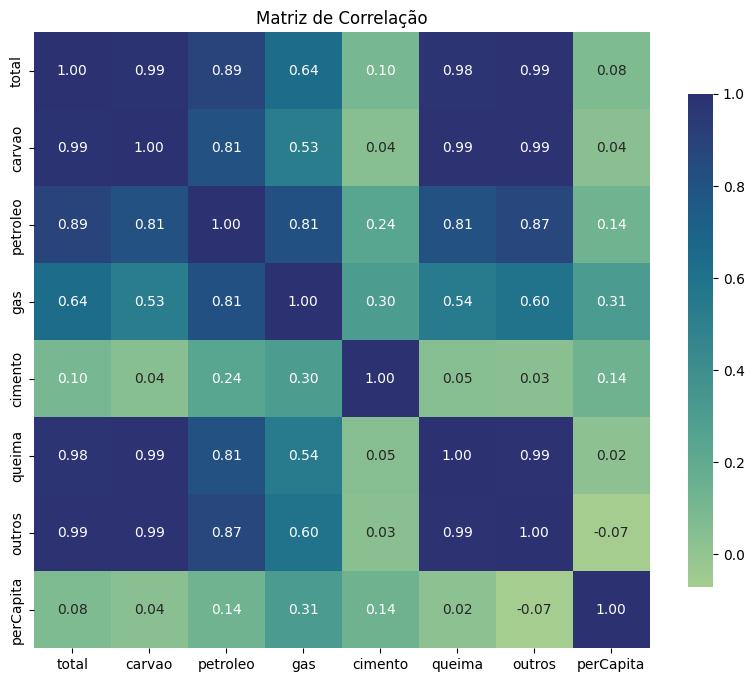

In [ ]:
colunas_desejadas = [
    "total", "carvao", "petroleo", "gas", "cimento",
    "queima", "outros", "perCapita"
]

dados_filtrado = dados[colunas_desejadas]

# Calculando a matriz de correlação para os dados filtrados
correlation_matrix = dados_filtrado.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="crest", square=True, cbar_kws={"shrink": .8})

plt.title('Matriz de Correlação')
plt.show()

A análise mostrou que as emissões de CO₂ de **carvão, queima e outros** estão fortemente relacionadas com as emissões totais. Ou seja, quando essas fontes aumentam, as emissões totais também aumentam. Petróleo, gás e cimento têm uma correlação menor com as emissões totais, mas ainda influenciam as emissões.

A variável **per capita**, que se refere às emissões de CO₂ por pessoa, tem uma correlação fraca com as fontes de emissão. Isso sugere que, mesmo com o aumento das emissões totais, as emissões per capita não estão tão diretamente ligadas a essas fontes específicas de emissão.

Em resumo, as principais fontes de emissão são carvão e queima, enquanto per capita e cimento têm um impacto menor nas emissões. Esses dados podem ajudar a entender melhor as fontes de CO₂ e a desenvolver políticas ambientais mais eficazes.

---



# Análise e Combinação de Dados

### Tendências Históricas das Emissões de CO₂


**Pergunta:** Quais são as principais tendências históricas observadas nas emissões de CO₂ ao longo do tempo?



---



**Confirmando os intervalos de tempo**

Primeiro, confirmamos o intervalo de tempo entre os anos que constavam nos dados.

In [ ]:
anos = sorted(dados['ano'].unique())
print("Anos disponíveis:", anos)

Anos disponíveis: [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


**Análise temporal das emissões totais de CO₂**

Então nós somamos as emissões de todos os países para cada ano e criamos um gráfico de linha.

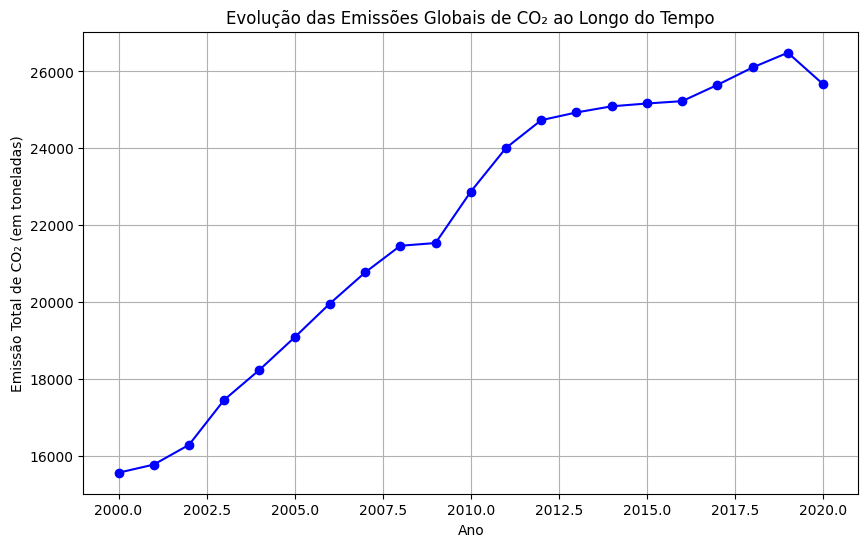

In [ ]:
# Agrupa os dados por ano e soma as emissões totais
emissoes_ano = dados.groupby('ano')['total'].sum()

plt.figure(figsize=(10, 6))
plt.plot(emissoes_ano.index, emissoes_ano.values, color='b', marker='o', linestyle='-')
plt.title("Evolução das Emissões Globais de CO₂ ao Longo do Tempo")
plt.xlabel("Ano")
plt.ylabel("Emissão Total de CO₂ (em toneladas)")
plt.grid()
plt.show()

Observamos que, ao longo de 20 anos, houve um aumento significativo nas emissões de CO₂ em todo o mundo. Isso destaca a crescente necessidade de adotar medidas urgentes para reduzir essas emissões, ao mesmo tempo em que promovemos o uso de energias renováveis e fontes de baixo impacto de carbono.

---



### Emissões de CO₂ por tipo de combustível

**Pergunta:** Como as emissões de CO₂ variam de acordo com os diferentes tipos de combustível utilizados?



---



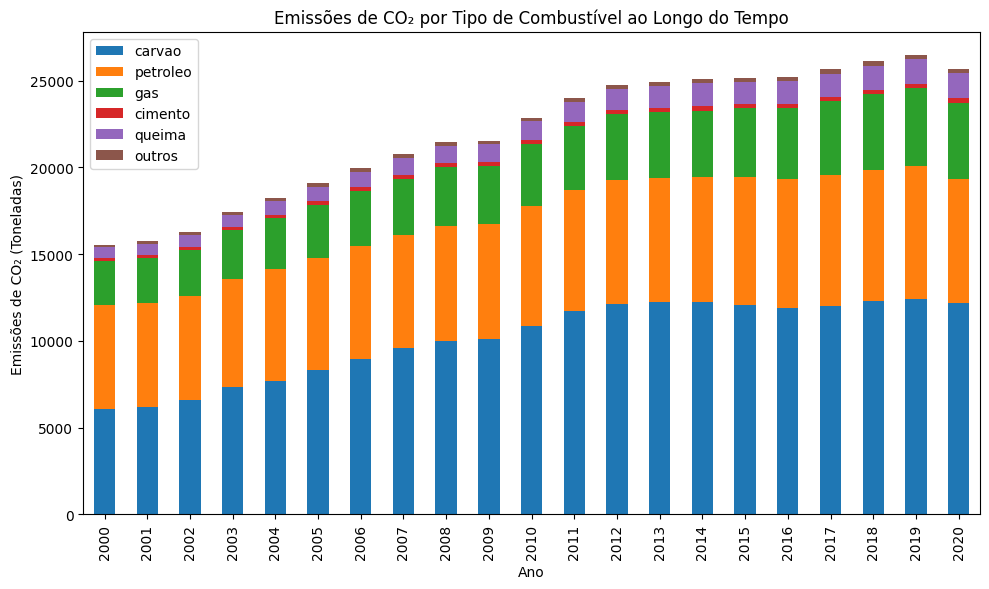

In [ ]:
emissao_por_combustivel = dados[['ano', 'pais', 'carvao', 'petroleo', 'gas', 'cimento', 'queima', 'outros']]

# Soma as emissões por tipo de combustível para cada ano
emissao_ano_combustivel = emissao_por_combustivel.groupby('ano').sum()

emissao_ano_combustivel.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Emissões de CO₂ por Tipo de Combustível ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Emissões de CO₂ (Toneladas)')
plt.tight_layout()
plt.show()

Podemos ver que, os maiores responsáveis pela emissão de CO₂ durante todos os 20 anos foram o carvão e o petróleo.

A queima, produção de cimento e outros tipos de meios energéticos emitivam bem menos CO₂, e não variaram na quantidade total emitidas durante os anos.

---



### Acesso à eletricidade e emissões

**Pergunta:** Qual é a relação entre o acesso à eletricidade e as emissões de CO₂ na China e no Burundi?



---




Decidimos realizar uma análise comparativa entre o país que emite mais CO₂ e o que emite menos, a fim de identificar as diferenças entre eles, incluindo o acesso à eletricidade.

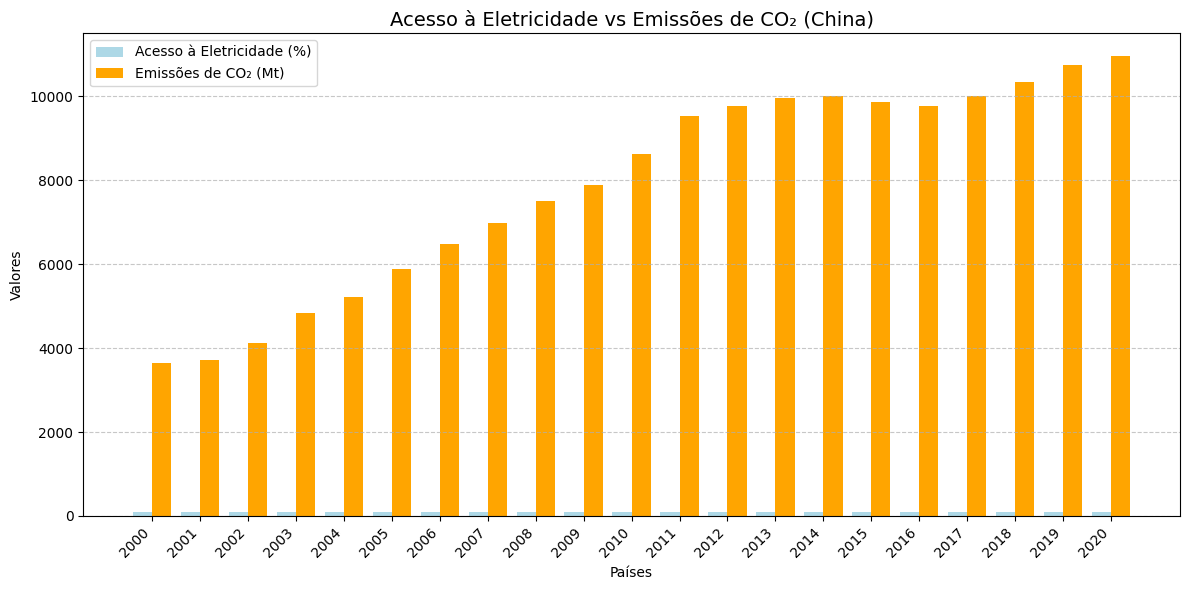

In [ ]:
# Filtrando o ano de interesse
pais_analise = 'China'
dados_ano = dados[dados['pais'] == pais_analise]

df = dados_ano[['ano', 'acesso_eletricidade', 'total']]

fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.4
x = np.arange(len(df['ano']))

bars1 = ax.bar(x - bar_width/2, df['acesso_eletricidade'], bar_width, label='Acesso à Eletricidade (%)', color='lightblue')

bars2 = ax.bar(x + bar_width/2, df['total'], bar_width, label='Emissões de CO₂ (Mt)', color='orange')

ax.set_xticks(x)
ax.set_xticklabels(df['ano'], rotation=45, ha='right')
ax.set_title(f"Acesso à Eletricidade vs Emissões de CO₂ ({pais_analise})", fontsize=14)
ax.set_ylabel("Valores")
ax.set_xlabel("Países")
ax.legend(loc='upper left', fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


O gráfico mostra que o acesso à eletricidade na China foi quase **100%** entre 2000 e 2020, enquanto as emissões de CO₂ cresceram muito nesse período. Isso aconteceu por causa do rápido crescimento industrial do país, que depende de combustíveis fósseis. Isso indica a importância de usar fontes de energia mais limpas no futuro.

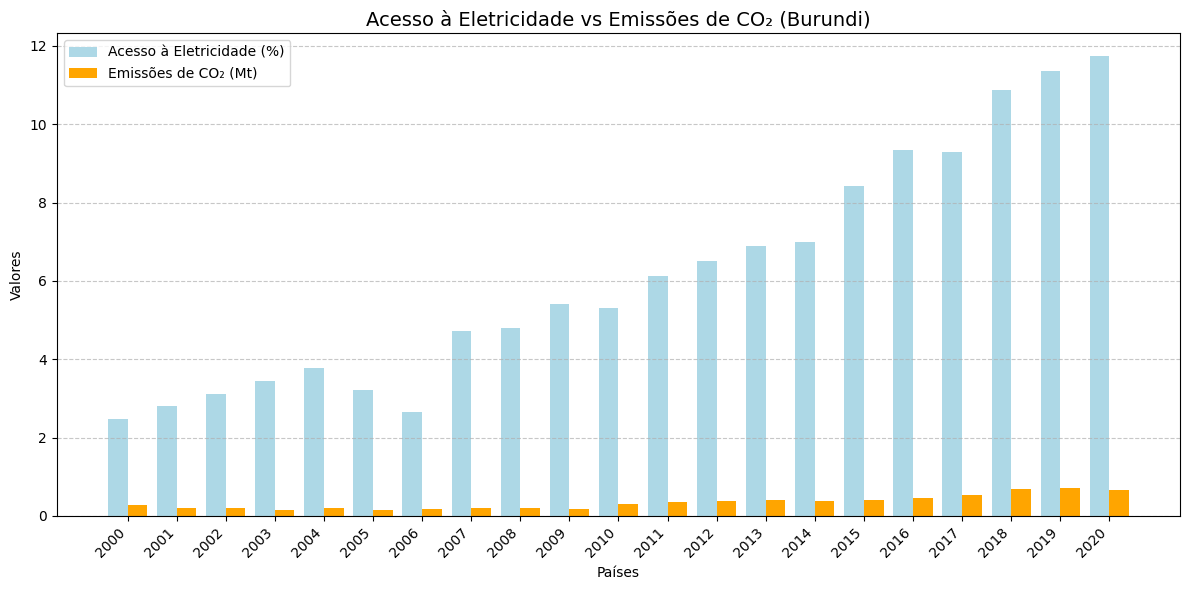

In [ ]:
# Filtrando o ano de interesse
pais_analise = 'Burundi'
dados_ano = dados[dados['pais'] == pais_analise]

df = dados_ano[['ano', 'acesso_eletricidade', 'total']]

fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.4
x = np.arange(len(df['ano']))

bars1 = ax.bar(x - bar_width/2, df['acesso_eletricidade'], bar_width, label='Acesso à Eletricidade (%)', color='lightblue')

bars2 = ax.bar(x + bar_width/2, df['total'], bar_width, label='Emissões de CO₂ (Mt)', color='orange')

ax.set_xticks(x)
ax.set_xticklabels(df['ano'], rotation=45, ha='right')
ax.set_title(f"Acesso à Eletricidade vs Emissões de CO₂ ({pais_analise})", fontsize=14)
ax.set_ylabel("Valores")
ax.set_xlabel("Países")
ax.legend(loc='upper left', fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


O gráfico mostra que o acesso à eletricidade no Burundi é muito menor comparado com a China. As emissões de CO₂ se mantem em valores baixos , porém o acesso a eletricidade também fica longe dos 100%.

### Média das emissões de CO₂ por intervalo de energia renovável

**Pergunta:** Como as diferentes faixas de energia renovável impactam as emissões médias de CO₂ nos países analisados?



---



<ipython-input-30-e158d3e614ce>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_emissoes = dados.groupby('energia_renovavel_intervalo')['total'].mean().reset_index()
<ipython-input-30-e158d3e614ce>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=media_emissoes, x='energia_renovavel_intervalo', y='total', palette='Blues_d')


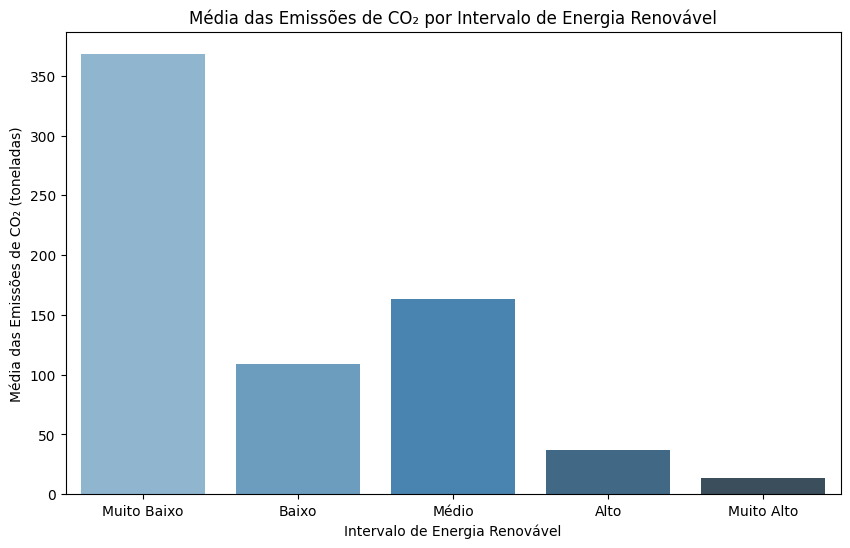

In [ ]:
dados['energia_renovavel_intervalo'] = pd.cut(dados['energia_renovavel'], bins=5, labels=['Muito Baixo', 'Baixo', 'Médio', 'Alto', 'Muito Alto'])

# Cálculo da média
media_emissoes = dados.groupby('energia_renovavel_intervalo')['total'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=media_emissoes, x='energia_renovavel_intervalo', y='total', palette='Blues_d')
plt.title('Média das Emissões de CO₂ por Intervalo de Energia Renovável')
plt.xlabel('Intervalo de Energia Renovável')
plt.ylabel('Média das Emissões de CO₂ (toneladas)')
plt.show()

Podemos observar, através deste gráfico, que os países que não utilizam energia renovável apresentam índices elevados de emissões de CO₂. Por outro lado, os países que fazem uso de energia renovável têm, em média, emissões de CO₂ abaixo de 50 toneladas.

# Análise de Dados Utilizando o Scikit-Learn

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

from sklearn.impute import SimpleImputer

### Regressão para Identificação de Fatores Mais Influentes - Lasso

**Pergunta:** É possível prever as emissões futuras de CO₂ com base nas tendências passadas?



---



Coeficientes: [-3.14577275e-04  1.13246493e+00  1.26742746e-01  2.22466940e+00
  1.86191281e-01  1.72907506e-01  2.71750941e-01]


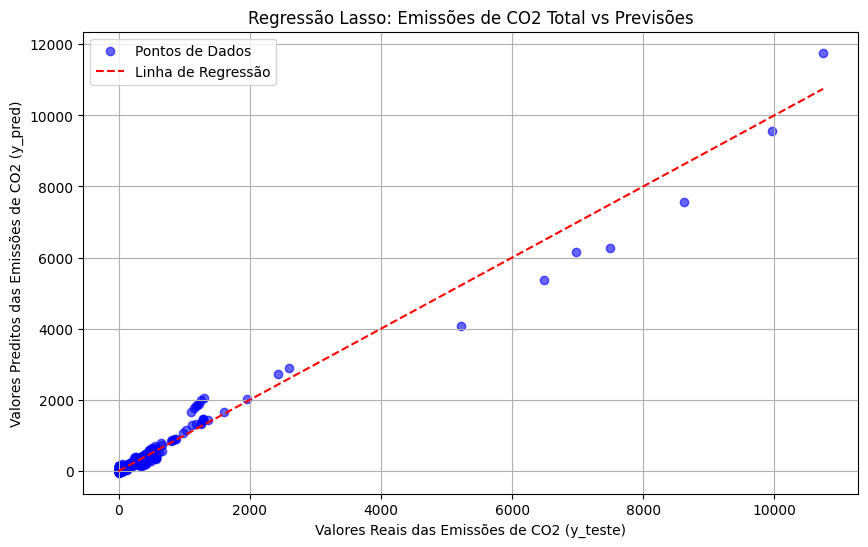

In [ ]:
X = dados[['PIB', 'crescimento_PIB', 'acesso_eletricidade', 'combustivel_fossel', 'eletricidade_nuclear', 'eletricidade_renovavel', 'eletricidade_baixoco2']]
y = dados['total']

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Dividindo os dados em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Aplicação do Lasso com uma penalidade específica
model = Lasso(alpha=0.1)
model.fit(X_treino, y_treino)

print("Coeficientes:", model.coef_)

# Previsões do modelo
y_pred = model.predict(X_teste)

# Gráfico de Regressão
plt.figure(figsize=(10, 6))
plt.scatter(y_teste, y_pred, color='blue', label="Pontos de Dados", alpha=0.6)
plt.plot([min(y_teste), max(y_teste)], [min(y_teste), max(y_teste)], color='red', linestyle='--', label="Linha de Regressão")
plt.title("Regressão Lasso: Emissões de CO2 Total vs Previsões")
plt.xlabel("Valores Reais das Emissões de CO2 (y_teste)")
plt.ylabel("Valores Preditos das Emissões de CO2 (y_pred)")
plt.legend()
plt.grid(True)
plt.show()



---
**Explicação da Label/tag**


No modelo de Lasso, a label (ou variável alvo) é 'total', que representa as emissões totais de CO₂. O modelo tenta prever as emissões de CO₂ com base em variáveis como PIB, acesso à eletricidade, combustíveis fósseis, entre outras. Durante o treinamento (fit), o modelo ajusta seus parâmetros para aprender a relação entre essas variáveis e as emissões de CO₂, para fazer previsões mais precisas.


---



A análise mostrou que o crescimento do PIB, o acesso à eletricidade e o uso de combustíveis fósseis são os principais fatores que aumentam as emissões de CO₂. Isso indica que, conforme os países se desenvolvem e mais pessoas têm acesso à eletricidade, as emissões de carbono tendem a crescer, especialmente quando essa eletricidade vem de combustíveis fósseis. Promover o uso de energias limpas e reduzir a dependência de fontes poluentes pode ajudar a controlar essas emissões no futuro.

### Análise de Correlação entre Energia Renovável e Emissões

**Pergunta:** Qual o impacto do aumento da energia renovável nas emissões de CO₂?



---



In [ ]:
X = dados[['eletricidade_baixoco2']]
y = dados['total']

# SimpleImputer para preencher valores nulos com a média
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

model = LinearRegression()
model.fit(X_imputed, y)

print("Coeficiente de Energia Baixo CO₂:", model.coef_[0])
print("Intercepto:", model.intercept_)

Coeficiente de Energia Baixo CO₂: -0.9535509379556885
Intercepto: 164.5973644190223




---
**Explicação da Label/tag**


**Variáveis independentes (X):** são as características que o modelo usa para fazer a previsão. A variável independente é 'eletricidade_baixoco2', que representa a eletricidade de baixa emissão de CO₂.

**Label/tag (y):** a label é a variável alvo, ou seja, o valor que o modelo tenta prever. Neste caso, a label é 'total', que representa as emissões totais de CO₂. O modelo de regressão linear é treinado para aprender a relação entre o uso de eletricidade de baixa emissão de CO₂ e as emissões totais de CO₂, de forma que, ao fornecer a variável de entrada 'eletricidade_baixoco2', ele possa prever o valor da variável 'total'.



---



* Coeficiente de Energia Baixo CO₂: -0.9535 significa que, para cada unidade de
aumento na eletricidade proveniente de fontes de baixo carbono, espera-se uma redução de aproximadamente 0.95 unidades nas emissões de CO₂, mantendo as outras variáveis constantes.
* Intercepto: 164.597 indica o valor estimado de emissões de CO₂ quando a eletricidade de baixo carbono é zero, ou seja, sem contribuição de fontes de baixo carbono.

A análise realizada mostrou uma relação inversa entre a proporção de eletricidade gerada a partir de fontes de baixo carbono (como energia nuclear e renováveis) e as emissões de CO₂. O modelo de regressão indicou que, à medida que a eletricidade de baixo carbono aumenta, as emissões de CO₂ tendem a diminuir, o que sugere que a transição para fontes de energia mais limpas pode contribuir significativamente para a redução das emissões globais de carbono. Esse resultado reforça a importância de investir em energias renováveis e nucleares como parte das estratégias para combater as mudanças climáticas.

### Análise de Previsões Baseadas em Modelagem Preditiva

**Pergunta:** Como a distribuição de países nas classes de alta e baixa emissão de CO₂ varia entre os dados de teste, e quais padrões podem ser observados nas previsões do modelo?



---



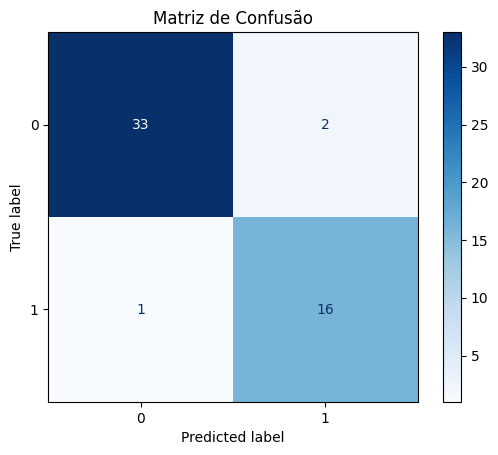


Relatório de Classificação

              precision    recall  f1-score   support

           0       0.97      0.94      0.96        35
           1       0.89      0.94      0.91        17

    accuracy                           0.94        52
   macro avg       0.93      0.94      0.94        52
weighted avg       0.94      0.94      0.94        52



In [ ]:
dados_agrupados = dados.groupby('pais').agg({
    'total': 'sum',
    'acesso_eletricidade': 'mean',
    'FEL': 'mean',
    'ERPC': 'mean',
    'combustivel_fossel': 'mean',
    'eletricidade_nuclear': 'mean',
    'eletricidade_renovavel': 'mean',
    'consumo_pessoa': 'mean',
    'crescimento_PIB': 'mean',
    'PIB': 'mean',
    'energia_renovavel': 'mean',
    'perCapita': 'mean'
}).reset_index()

# Criação da variável dependente 'emissao_class'
limite_emissao = 1000  #(Altas emissões: total > 1000, Baixas emissões: total <= 1000)
dados_agrupados['emissao_class'] = dados_agrupados['total'].apply(lambda x: 1 if x > limite_emissao else 0)

# Variáveis independentes
variaveis_independentes = ['acesso_eletricidade', 'FEL', 'ERPC', 'combustivel_fossel',
                           'eletricidade_nuclear', 'eletricidade_renovavel',
                           'consumo_pessoa', 'crescimento_PIB', 'PIB', 'energia_renovavel', 'perCapita']

X = dados_agrupados[variaveis_independentes]
y = dados_agrupados['emissao_class']

# Dados em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

# Previsões
y_pred = modelo.predict(X_test)

# Avaliação do modelo
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                              display_labels=modelo.classes_)

disp.plot(cmap='Blues', colorbar=True)
plt.title("Matriz de Confusão")
plt.show()

print("\nRelatório de Classificação\n")
print(classification_report(y_test, y_pred))




---
**Explicação da Label/tag**

Neste modelo, a label (ou variável alvo) é 'emissao_class', que classifica os países em altas ou baixas emissões de CO₂.

* **Label/Tag (y):** a label é criada com base no valor da variável 'total' (emissões totais de CO₂):
    * Emissões altas (1): se o valor total de emissões de CO₂ de um país for maior que 1000, o país é classificado como 1.
    * Emissões baixas (0): se o valor total de emissões de CO₂ for igual ou menor que 1000, o país é classificado como 0.

O modelo de **RandomForestClassifier** é treinado para prever essa classificação usando variáveis como PIB, acesso à eletricidade, energia renovável, entre outras.

---



**Tamanho dos conjuntos de treinamento e teste**

In [ ]:
print(f"Tamanho do conjunto de treinamento: {len(X_train)}")
print(f"Tamanho do conjunto de teste: {len(X_test)}")

Tamanho do conjunto de treinamento: 120
Tamanho do conjunto de teste: 52


Apenas 52 países fizeram parte do conjunto de teste e 120 países fizeram parte do conjunto de treinamento. No total, temos 172 países no banco de dados, mostrando que os valores estão certos.

**Número de países em baixa e alta previsão**

In [ ]:
classe_0 = (y_pred == 0).sum()  # Baixa emissão (classe 0)
classe_1 = (y_pred == 1).sum()  # Alta emissão (classe 1)

print(f"Número de países classificados como baixa emissão (classe 0): {classe_0}")
print(f"Número de países classificados como alta emissão (classe 1): {classe_1}")

Número de países classificados como baixa emissão (classe 0): 34
Número de países classificados como alta emissão (classe 1): 18


A distribuição dos países nas duas classes de emissão de CO₂ mostra que a maioria dos países foi classificada como baixa emissão (classe 0), enquanto uma quantidade menor foi classificada como alta emissão (classe 1).

**Distribuição das classes**

O modelo classificou 34 países como baixa emissão e 18 países como alta emissão.

**Padrões observados**

* Baixa Emissão (classe 0):
 Os países nesta classe geralmente têm PIB menor, menor consumo de energia por pessoa e maior uso de energias renováveis, o que resulta em menos emissões de CO₂.
* Alta Emissão (classe 1):
 Os países classificados como alta emissão tendem a ter PIB mais alto, maior consumo de energia e dependem mais de combustíveis fósseis, o que aumenta suas emissões de CO₂.

**Conclusão**

O modelo conseguiu identificar algumas tendências importantes, como a relação entre o uso de energia e as emissões de CO₂. A maior parte dos países tem emissões mais baixas, mas alguns países com PIB maior e mais consumo de energia são classificados com alta emissão.

### Previsão das Emissões de CO₂ com Regressão Linear e Não Linear

**Pergunta:** Como as variáveis socioeconômicas e energéticas influenciam as emissões de CO₂ de diferentes países, segundo o modelo de regressão linear?



---



**Regressão linear**

In [ ]:
X = dados[['acesso_eletricidade','FEL', 'ERPC', 'PIB', 'energia_renovavel', 'consumo_pessoa',
           'crescimento_PIB', 'perCapita', 'eletricidade_renovavel', 'eletricidade_nuclear', 'combustivel_fossel']]   # Variáveis independentes
y = dados['total']  # Variável dependente

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

modelo = LinearRegression()

modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Coeficiente de Determinação R²: {r2}")
print(f"Erro Quadrático Médio (MSE): {mse}")

Coeficiente de Determinação R²: 0.9764776918724841
Erro Quadrático Médio (MSE): 11180.37169926518




---
**Explicação da Label/tag**

A Label modelo é a variável 'total', que representa as emissões totais de CO₂. Durante o treinamento do modelo, o objetivo é aprender a prever as emissões totais de CO₂ com base nas variáveis independentes fornecidas, como acesso à eletricidade, FEL, PIB, energia renovável, crescimento do PIB, entre outras.

O modelo de LinearRegression ajusta seus parâmetros para encontrar a relação entre essas variáveis e as emissões de CO₂, permitindo fazer previsões (y_pred) sobre as emissões futuras.



---




O modelo de **regressão linear** obteve um excelente desempenho, explicando 97,6% da variação nas emissões de CO₂ com base nas variáveis analisadas. Isso indica que o modelo é capaz de prever com boa precisão os valores de emissão. Embora o Erro Quadrático Médio (MSE) tenha sido relativamente alto, com o valor de 11180,37, o alto R² sugere que o modelo é eficaz na captura da maior parte da variação dos dados, o que significa que, no geral, ele está funcionando muito bem para as previsões.

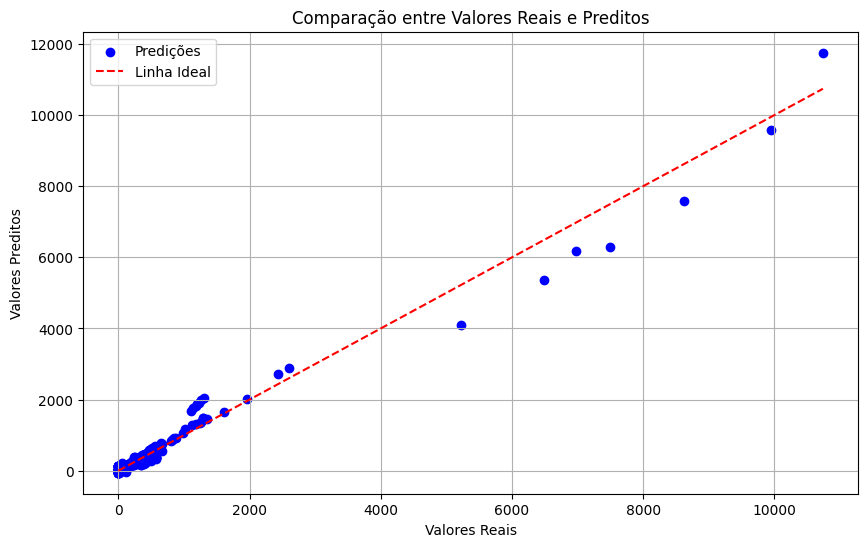

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predições')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Linha Ideal')

plt.title('Comparação entre Valores Reais e Preditos')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.legend()
plt.grid(True)
plt.show()

Como podemos ver, temos as bolinhas azuis bem próximas da reta da regressão, o que indica um bom desempenho, porém, ainda temos algumas bolinhas um pouco afastadas da reta.

**Regressão não linear**

In [ ]:
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)

modelo_rf.fit(X_train, y_train)

y_pred_rf = modelo_rf.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f"Coeficiente de Determinação R²: {r2_rf}")
print(f"Erro Quadrático Médio (MSE): {mse_rf}")

Coeficiente de Determinação R²: 0.9951108612654326
Erro Quadrático Médio (MSE): 2323.8530864152754




---
**Explicação da Label/tag**


A label/tag no modelo RandomForestRegressor é a variável 'total', que representa as emissões totais de CO₂. O modelo aprende a prever essas emissões com base nas variáveis independentes, como PIB e energia renovável. A avaliação é feita usando o R² (coeficiente de determinação) e o MSE (erro quadrático médio).


---




O modelo de **regressão não linear** obteve um R² de 99,5%, o que significa que ele explicou quase toda a variação nas emissões de CO₂, mostrando um excelente desempenho. O Erro Quadrático Médio (MSE) foi de 2323,85, bem menor que o da regressão linear, indicando que as previsões foram mais precisas. Em resumo, a regressão não linear teve um ajuste muito bom aos dados e previu as emissões de CO₂ com maior precisão.



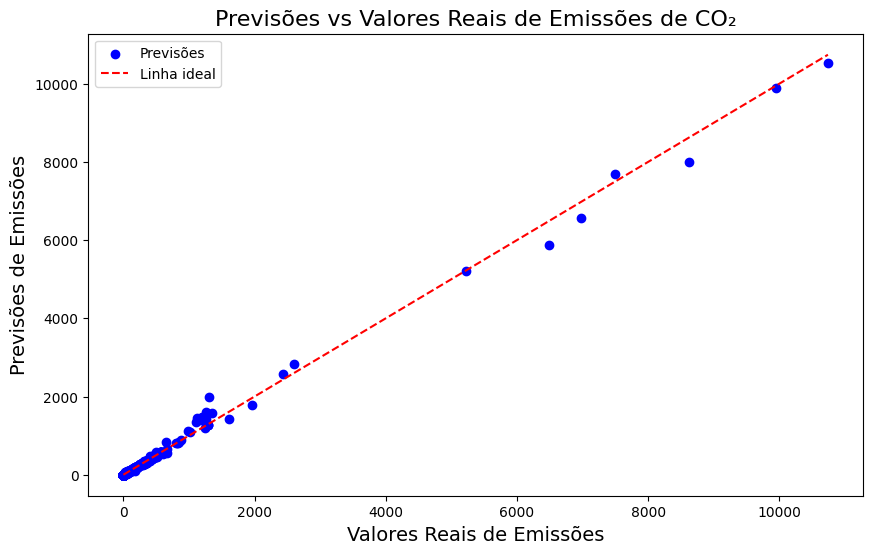

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', label='Previsões')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Linha ideal')

plt.title('Previsões vs Valores Reais de Emissões de CO₂', fontsize=16)
plt.xlabel('Valores Reais de Emissões', fontsize=14)
plt.ylabel('Previsões de Emissões', fontsize=14)
plt.legend()
plt.show()

O gráfico consegue nos mostrar melhor ainda esta relação.

Podemos notar que as bolinhas azuis estão bem próximas na reta, o que indica que realmente, o modelo de regressão não linear teve um ótimo desempenho explicando as variações das emissões de CO2 comparado com as variáveis.



---


Os resultados mostram que as variáveis socioeconômicas e energéticas influenciam bastante as emissões de CO₂ nos países. O modelo de **regressão linear** explicou bem as emissões, mas não capturou todas as relações complexas entre as variáveis, com um R² de 97,6% e um erro moderado nas previsões. Já o modelo de **regressão não linear** teve um desempenho superior, com R² de 99,5%, indicando que ele conseguiu prever as emissões com mais precisão, capturando melhor as interações entre as variáveis. Em resumo, ambos os modelos mostram que as variáveis socioeconômicas e energéticas têm um grande impacto nas emissões de CO₂, mas o modelo não linear foi mais eficaz nas previsões.

### Comparação entre modelos

**Tabela criada no Google Docs**

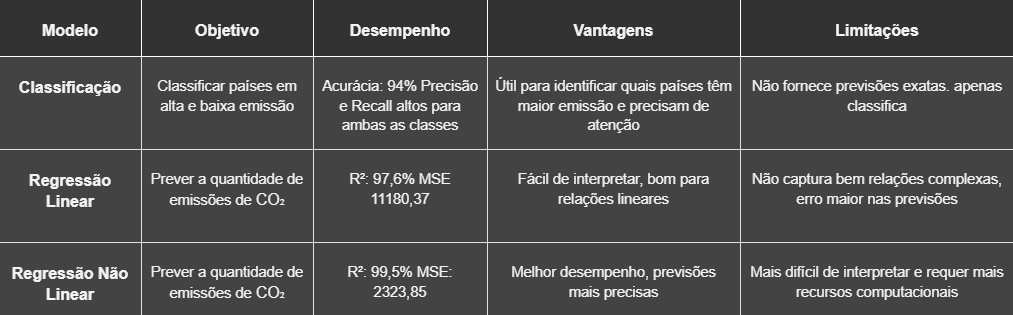

O modelo de **classificação** foi usado para dividir os países em alta emissão e baixa emissão, com uma boa acurácia de 94%. No entanto, ele não fornece a quantidade exata de emissões, apenas classifica os países. Esse modelo pode ser útil para identificar quais países têm as emissões mais altas e ajudar a priorizar quais países precisam de mais atenção nas previsões feitas pelo modelo de regressão.

O modelo de **regressão linear** previu as emissões de CO₂, explicando 97,6% da variação nos dados. Porém, ele teve um erro maior nas previsões, com um MSE de 11180,37.

O modelo de **regressão não linear** teve o melhor desempenho, com 99,5% de explicação da variação nas emissões e um MSE bem menor (2323,85), mostrando previsões muito mais precisas.


**Conclusão**

O modelo de regressão não linear foi o melhor para fazer previsões, pois obteve o melhor ajuste aos dados e as previsões mais precisas. Além disso, o modelo de classificação pode complementar o modelo de regressão, ajudando a identificar e priorizar os países com maior emissão de CO₂, enquanto o modelo de regressão fornece a quantidade exata de emissões para uma análise mais detalhada e completa.

# Testes de Hipótese

### Correlação entre combustíveis fósseis e emissões de CO₂

**Pergunta:** Como o uso de combustíveis fósseis influencia as emissões de CO₂?



---



In [ ]:
from scipy.stats import pearsonr

# Remove valores ausentes (NaN) e infinitos
dados_limpos = dados[['combustivel_fossel', 'total']].dropna()
dados_limpos = dados_limpos[~dados_limpos.isin([float('inf'), float('-inf')]).any(axis=1)]

# Correlação de Pearson
correlacao, p_valor = pearsonr(dados_limpos['combustivel_fossel'], dados_limpos['total'])

print(f"Correlação de Pearson: {correlacao}")
print(f"P-valor: {p_valor}")

if p_valor < 0.05:
    print("Rejeitamos a hipótese nula. Há uma relação significativa entre o uso de combustíveis fósseis e as emissões de CO₂.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidências suficientes para afirmar que o uso de combustíveis fósseis afeta as emissões de CO₂ de forma significativa.")

Correlação de Pearson: 0.9901996811326624
P-valor: 0.0
Rejeitamos a hipótese nula. Há uma relação significativa entre o uso de combustíveis fósseis e as emissões de CO₂.



A análise mostrou que há uma forte correlação entre o uso de combustíveis fósseis e as emissões de CO₂. A correlação de 0.99 indica que, conforme o uso de combustíveis fósseis aumenta, as emissões de CO₂ também aumentam praticamente na mesma proporção. Além disso, o p-valor de 0.0 indica que essa relação é estatisticamente significativa, ou seja, é muito improvável que tenha ocorrido por acaso. Isso reforça a ideia de que reduzir o uso de combustíveis fósseis pode ser uma forma eficaz de diminuir as emissões de CO₂.

### Teste t

**Pergunta:** O Acordo de Paris teve um impacto significativo nas emissões de CO₂ desde sua implementação em 2015?



---



Através do teste t, buscamos entender se os valores de emissão de CO₂ mundial mudaram após a implementação de políticas ambientais voltadas para a diminuição desse fator. Para isso, avaliamos os valores de emissão de CO₂ antes e depois da entrada em vigor de uma política específica: o Acordo de Paris, adotado em 2015 durante a Conferência das Nações Unidas sobre Mudanças Climáticas (COP21).

In [ ]:
ano_politica = 2015

# Dados antes e depois da política
antes_politica = dados[dados['ano'] < ano_politica]['total']
depois_politica = dados[dados['ano'] >= ano_politica]['total']

# Teste t
t_stat, p_valor = stats.ttest_ind(antes_politica, depois_politica)

print(f"Estatística t: {t_stat}")
print(f"P-valor: {p_valor}")

if p_valor < 0.05:
    print("Rejeitamos a hipótese nula: Há uma diferença significativa nas emissões de CO₂ antes e depois da política.")
else:
    print("Não rejeitamos a hipótese nula: Não há diferença significativa nas emissões de CO₂ antes e depois da política.")

Estatística t: -1.1956410586388886
P-valor: 0.23191622893954789
Não rejeitamos a hipótese nula: Não há diferença significativa nas emissões de CO₂ antes e depois da política.



O teste t mostrou que não há diferença significativa nas emissões de CO₂ antes e depois de 2015, ano do Acordo de Paris. O p-valor alto (0.232) sugere que a política não teve um impacto claro nas emissões. Portanto, não podemos concluir que o Acordo de Paris tenha causado uma mudança significativa nas emissões de CO₂ até agora.

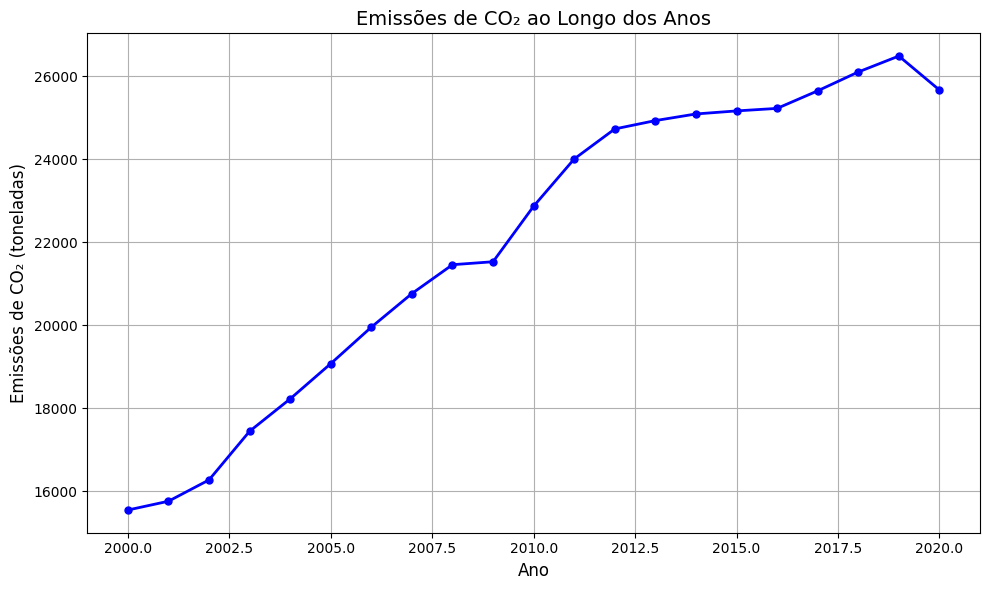

In [ ]:
emissoes_ano = dados.groupby('ano')['total'].sum()

plt.figure(figsize=(10,6))
plt.plot(emissoes_ano.index, emissoes_ano.values, marker='o', color='b', linestyle='-', linewidth=2, markersize=5)
plt.title('Emissões de CO₂ ao Longo dos Anos', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Emissões de CO₂ (toneladas)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

Colocamos inclusive um gráfico que mostra estes valores durante 20 anos. Podemos perceber que, mesmo depois de 2015, ainda continuaram a subir as emissões de CO₂ no mundo todo, o que reforça mais ainda os valores do teste t.

# Conclusão

A análise revelou que o uso de combustíveis fósseis, especialmente carvão e petróleo, tem uma forte correlação com as emissões de CO₂. A correlação de 0.99 indica que, à medida que o uso desses combustíveis aumenta, as emissões de CO₂ também aumentam, sugerindo que a redução do uso de combustíveis fósseis pode ser uma estratégia eficaz para mitigar as emissões.

Os modelos preditivos mostraram que a regressão não linear foi o mais preciso, com um R² de 99,5%, enquanto a regressão linear, apesar de útil, teve um erro maior nas previsões. O modelo de classificação teve boa acurácia (94%) para identificar países com alta e baixa emissão de CO₂.

Em relação ao Acordo de Paris, o teste t mostrou que não houve diferença significativa nas emissões antes e depois de 2015, com um p-valor de 0.232. Isso sugere que o Acordo de Paris ainda não teve um impacto claro nas emissões globais, que continuaram a subir após 2015.

Esses resultados indicam que, embora haja esforços globais para reduzir as emissões de CO₂, as políticas atuais ainda não são suficientes. Para alcançar os objetivos climáticos de longo prazo, é necessário reduzir a dependência de combustíveis fósseis e investir mais em energias renováveis e de baixo carbono.

# Referências

* **Kaggle (csv: emissão):** https://www.kaggle.com/datasets/thedevastator/global-fossil-co2-emissions-by-country-2002-2022
* **Kaggle (csv: energia):** https://www.kaggle.com/datasets/anshtanwar/global-data-on-sustainable-energy
* **Scikit-learn:** https://scikit-learn.org/stable/
* **Pandas:** https://pandas.pydata.org/docs/
* **NumPy:** https://numpy.org/